# Date Fruit Classification.
Srinivas Dengle

### Problem Statement:
In food production it is important to properly label ingredients for both health and business reasons. However, sometimes mistakes are made and there is room for improvement in food labeling practices. A number of different types of dates are grown around the world, and it takes expertise to correctly identify the variety. Your job as a machine learning developer is to create a model that can identify the type of date from external features such as colour, length, diameter and shape factors which have been determined by a computer vision model.

# Question 1

In [1]:
# Importing Libararies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation, Dense
from tensorflow import keras
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# 1A

In [2]:
# Load Datasets
cd = pd.read_csv("Date_Fruit_Datasets.csv")
cd

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-5.919126e+10,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-3.423307e+10,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-9.394835e+10,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-3.207431e+10,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-3.998097e+10,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,...,2.2423,2.3704,2.7202,-2.529642e+10,-19168882688,-18473392128,49.0869,43.0422,42.4153,SOGAY
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,...,3.4109,3.5805,3.9910,-3.160522e+10,-21945366528,-19277905920,46.8086,39.1046,36.5502,SOGAY
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,...,2.2759,2.5090,2.6951,-2.224277e+10,-19594921984,-17592152064,44.1325,40.7986,40.9769,SOGAY
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,...,2.6769,2.6874,2.7991,-2.604860e+10,-21299822592,-19809978368,51.2267,45.7162,45.6260,SOGAY


In [3]:
# describe the dataset
pd.set_option('display.max_columns', 40)
cd.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,MeanRR,MeanRG,MeanRB,StdDevRR,StdDevRG,StdDevRB,SkewRR,SkewRG,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,8.980000e+02,8.980000e+02,8.980000e+02,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,2.131102,0.857720,0.807190,0.003428,0.001794,0.655420,0.988680,100.165885,97.609401,96.194889,29.047436,26.383362,26.148330,0.089266,0.564139,0.250518,4.247845,5.110894,3.780928,-3.185021e+10,-2.901860e+10,-2.771876e+10,50.082888,48.805681,48.098393
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,17.820778,0.070839,0.062175,0.020456,0.000428,0.094314,0.020473,32.126549,28.251801,21.627409,6.306931,5.462164,4.905078,0.943285,1.039813,0.632918,2.892357,3.745463,2.049831,2.037241e+10,1.712952e+10,1.484137e+10,16.063125,14.125911,10.813862
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,1.065300,0.004800,0.041100,0.001700,0.001100,0.001700,0.756800,30.382600,41.048000,44.256900,7.303800,8.655700,5.148600,-1.724200,-1.834400,-1.029100,1.708200,1.607600,1.767200,-1.091220e+11,-9.261697e+10,-8.747177e+10,15.191100,20.524700,22.130000
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,1.373725,0.827750,0.768050,0.002200,0.001500,0.589975,0.989300,76.448000,77.306125,78.502375,24.901525,22.289650,22.890975,-0.549900,-0.230200,-0.196950,2.536625,2.508850,2.577275,-4.429444e+10,-3.894638e+10,-3.564534e+10,38.224425,38.654525,39.250725
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,1.524150,0.867750,0.804950,0.002600,0.001600,0.647950,0.993600,107.682450,100.676000,99.225600,29.709450,25.638300,26.469000,-0.162700,0.243750,0.135550,3.069800,3.127800,3.080700,-2.826156e+10,-2.620990e+10,-2.392928e+10,53.841300,50.337800,49.614100
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,1.674750,0.899500,0.848875,0.003200,0.002075,0.720625,0.996400,126.127450,119.159600,113.332250,33.274375,29.905325,29.482375,0.471025,1.406550,0.593950,4.449850,7.320400,4.283125,-1.460482e+10,-1.433105e+10,-1.660367e+10,63.063350,59.573600,56.666675
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,0.977300,0.968100,0.615400,0.004300,0.937300,0.999500,159.649400,166.135400,148.211400,48.571200,45.510700,42.422800,3.223600,3.697100,3.092300,26.171100,26.736700,32.249500,-1.627316e+08,-5.627727e+08,-4.370435e+08,79.828900,83.064900,74.104600


In this dataset we have 34 features(columns) and 898 entities. our label would be Class.

# Morphological features

1. **AREA**: surface area of the date.
2. **PERIMETER**: The perimeter length of the date.
3. **MAJOR_AXIS**: The length of longest axis of the date.
4. **MINOR_AXIS**: The length of the minor shortest axis of the date.
5. **ECCENTRICITY**: The eccentricity
of a date
6. **EQDIASQ**:Equivalent diameter.
7. **SOLIDITY**: It considered the convex and convex condition of the date
8. **CONVEX_AREA**: It gave the number of pixels of the smallest convex shell at the region formed by a date.
9. **EXTENT**: It returned the ratio of a date fruit's area to the area of the bounding box that encompasses it.
10. **ASPECT_RATIO**: Describes the aspect ratio of the date.
11. **ROUNDNESS**: Indicates how round the date is.
12. **COMPACTNESS**: A metric for the date's compactness.

# Shape features
13. **SHAPEFACTOR_1 to SHAPEFACTOR_4**: Metrics that describe the shape of the date in various ways.

# Color features
14. **MeanRR, MeanRG, MeanRB**: Could indicate color characteristics of the date, particularly in the Red spectrum.
15. **StdDevRR, StdDevRG, StdDevRB**: Variability in the color features of the date.
16. **SkewRR, SkewRG, SkewRB**: Asymmetry in the color distribution of the date.
17. **KurtosisRR, KurtosisRG, KurtosisRB**: How peaked or flat the color distribution is for the date.
18. **EntropyRR, EntropyRG, EntropyRB**: Randomness or unpredictability of the color distribution in the date.
19. **ALLdaub4RR, ALLdaub4RG, ALLdaub4RB**:
20. **Class**: The type of the date.

# 1B

check for duplicate rows, or incorrect data types

In [4]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [5]:
cd[cd.duplicated()]

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,MeanRR,MeanRG,MeanRB,StdDevRR,StdDevRG,StdDevRB,SkewRR,SkewRG,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class


In [6]:
cd[cd.duplicated()].shape

(0, 35)

No duplicated values


In [7]:
cd.isnull().sum()

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
MeanRR           0
MeanRG           0
MeanRB           0
StdDevRR         0
StdDevRG         0
StdDevRB         0
SkewRR           0
SkewRG           0
SkewRB           0
KurtosisRR       0
KurtosisRG       0
KurtosisRB       0
EntropyRR        0
EntropyRG        0
EntropyRB        0
ALLdaub4RR       0
ALLdaub4RG       0
ALLdaub4RB       0
Class            0
dtype: int64

No missing values


# 1C

Text(0.5, 0, 'Class')

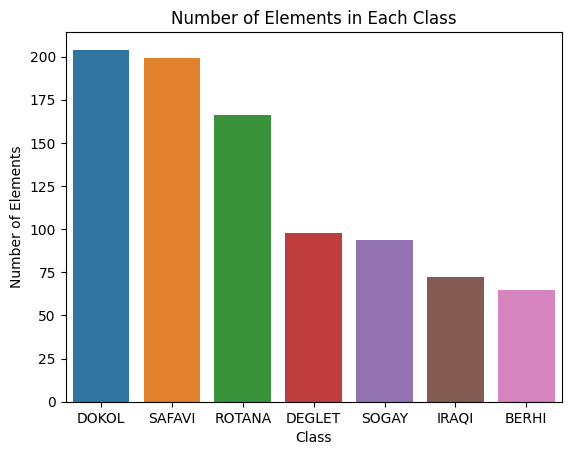

In [8]:
# Count the occurrences of each class
class_counts = cd['Class'].value_counts()
# Plot the data
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Number of Elements in Each Class')
plt.ylabel('Number of Elements')
plt.xlabel('Class')


this dataset is imbalanced. As we can see a huge gap in the samples  between ( DOKOL, SAFAVi, ROTANA) and (DEGLET, SOGAY, IRAQI, BERHI)

The total number of samples is 898, and there are 7 classes. So the average number of samples per class would be
898/7= 128.29≈128. while DOKOL has around 200 samples, BERHI has just 65.


# 1D

In [9]:
# Separating the labels into a separate DataFrame
labels_df = pd.DataFrame(cd['Class'], columns=['Class'])

# convert labels to integers
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels_df["Class"])

# RESHAPE THE LABELS INTO A 2D ARRAY
encoded_labels = labels_encoded.reshape(-1,1)

# 1E

In [10]:
X = cd.drop(columns="Class")
y = encoded_labels

# training/ Testing/ Validation - 70/15/15 respectively
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

# Print shapes of the datasets
print(f"Training data shape: {X_train.shape}, Labels shape: {y_train.shape}")
print(f"Validation data shape: {X_val.shape}, Labels shape: {y_val.shape}")
print(f"Testing data shape: {X_test.shape}, Labels shape: {y_test.shape}")

Training data shape: (628, 34), Labels shape: (628, 1)
Validation data shape: (135, 34), Labels shape: (135, 1)
Testing data shape: (135, 34), Labels shape: (135, 1)


In [11]:
# Scaling all the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [12]:
print(X_train_scaled.shape)
print(X_val_scaled.shape)
print(X_test_scaled.shape)

(628, 34)
(135, 34)
(135, 34)


In [13]:
X.columns.value_counts().sum()

34

# Question 2

# 2A

In [14]:
# Sequential model
model = keras.Sequential([
    # 34 features as an input
    keras.layers.Input(34),

    # First layer
    keras.layers.Dense(128, activation='relu'),
    # Second layer
    keras.layers.Dense(64, activation='relu'),

    # Output layer with only 7 classes
    keras.layers.Dense(7, activation='softmax'),
])

# Print a summary of the model
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               4480      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 7)                 455       
                                                                 
Total params: 13191 (51.53 KB)
Trainable params: 13191 (51.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# 2B

In [15]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 2C

In [29]:
# Train the model the model named history
history = model.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_val_scaled, y_val))

# Record training accuracy
training_accuracy = history.history['accuracy'][-1]

# Evaluate the model on the validation data to get validation accuracy
validation_loss, validation_accuracy = model.evaluate(X_val_scaled, y_val)
print(f"Validation Accuracy: {validation_accuracy:.4f}")

# Predict labels on the validation data
y_val_pred = model.predict(X_val_scaled)
y_val_pred_labels = np.argmax(y_val_pred, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred_labels)

print("Confusion Matrix:")
print(conf_matrix)



Epoch 1/100
20/20 [==============================] - 0s 12ms/step - loss: 0.1759 - accuracy: 0.9299 - val_loss: 0.2017 - val_accuracy: 0.9185
Epoch 2/100
20/20 [==============================] - 0s 13ms/step - loss: 0.1694 - accuracy: 0.9443 - val_loss: 0.2212 - val_accuracy: 0.9111
Epoch 3/100
20/20 [==============================] - 0s 12ms/step - loss: 0.1766 - accuracy: 0.9299 - val_loss: 0.2211 - val_accuracy: 0.9185
Epoch 4/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1673 - accuracy: 0.9363 - val_loss: 0.2191 - val_accuracy: 0.9037
Epoch 5/100
20/20 [==============================] - 0s 9ms/step - loss: 0.1587 - accuracy: 0.9411 - val_loss: 0.1948 - val_accuracy: 0.9185
Epoch 6/100
20/20 [==============================] - 0s 15ms/step - loss: 0.1761 - accuracy: 0.9395 - val_loss: 0.2209 - val_accuracy: 0.9037
Epoch 7/100
20/20 [==============================] - 0s 14ms/step - loss: 0.1665 - accuracy: 0.9379 - val_loss: 0.2240 - val_accuracy: 0.9037
Epoch 8/

In [31]:
# Printing Confusion Matrix and Validation Accuracy.
print("Confusion Matrix:")
print(conf_matrix)
print("")
print(f"Validation Accuracy: {validation_accuracy:.4f}")



Confusion Matrix:
[[13  0  0  0  0  0  0]
 [ 0 14  3  0  0  0  4]
 [ 0  0 25  0  0  0  0]
 [ 1  0  0  7  0  0  0]
 [ 0  0  0  0 27  0  1]
 [ 0  0  0  0  0 26  0]
 [ 1  1  0  0  0  0 12]]

Validation Accuracy: 0.9185


The validation accuracy of approximately 91.85% indicates that the model is making correct predictions for a majority of the samples. 

# 2D

In [18]:
# Initializing lists to store results
model_descriptions = []
training_accuracies = []
validation_accuracies = []
confusion_matrices = []


In [19]:
# Model 1: Changing layer dimensions
model_1 = keras.Sequential([
    keras.layers.Input(34),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(7, activation='softmax')
])
# Compile the model

model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# Train the model
history_1 = model_1.fit(X_train_scaled, y_train, epochs=100,
                        validation_data=(X_val_scaled, y_val))

model_descriptions.append("3 layers: 256, 128, 64 neurons. Adam optimizer. Relu activations.")

# Record training accuracy
training_accuracies.append(history_1.history['accuracy'][-1])
# Evaluate the model on the validation data to get validation accuracy

validation_loss, validation_accuracy = model_1.evaluate(X_val_scaled, y_val)
validation_accuracies.append(validation_accuracy)

# Predict labels on the validation data

y_val_pred = model_1.predict(X_val_scaled)
y_val_pred_labels = np.argmax(y_val_pred, axis=1)

# Compute confusion matrix
confusion_matrices.append(confusion_matrix(y_val, y_val_pred_labels))

Epoch 1/100


20/20 [==============================] - 2s 29ms/step - loss: 1.6423 - accuracy: 0.5494 - val_loss: 1.4668 - val_accuracy: 0.5630
Epoch 2/100
20/20 [==============================] - 0s 8ms/step - loss: 1.1314 - accuracy: 0.6322 - val_loss: 1.0290 - val_accuracy: 0.6222
Epoch 3/100
20/20 [==============================] - 0s 11ms/step - loss: 0.8016 - accuracy: 0.6943 - val_loss: 0.7690 - val_accuracy: 0.6667
Epoch 4/100
20/20 [==============================] - 0s 11ms/step - loss: 0.6428 - accuracy: 0.7611 - val_loss: 0.6397 - val_accuracy: 0.7407
Epoch 5/100
20/20 [==============================] - 0s 7ms/step - loss: 0.5241 - accuracy: 0.7994 - val_loss: 0.5441 - val_accuracy: 0.7926
Epoch 6/100
20/20 [==============================] - 0s 6ms/step - loss: 0.4805 - accuracy: 0.8248 - val_loss: 0.5216 - val_accuracy: 0.8148
Epoch 7/100
20/20 [==============================] - 0s 7ms/step - loss: 0.4473 - accuracy: 0.8392 - val_loss: 0.5068 - val_accuracy: 0.8148
Epoch 8/100
20/20 [===

In [20]:
# Model 2: Changing activation functions
model_2 = keras.Sequential([
    keras.layers.Input(34),
    keras.layers.Dense(128, activation='tanh'),
    keras.layers.Dense(64, activation='tanh'),
    keras.layers.Dense(7, activation='softmax')
])
model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_2 = model_2.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_val_scaled, y_val))
model_descriptions.append("2 layers: 128, 64 neurons. Adam optimizer. Tanh activations.")
training_accuracies.append(history_2.history['accuracy'][-1])
validation_loss, validation_accuracy = model_2.evaluate(X_val_scaled, y_val)
validation_accuracies.append(validation_accuracy)
y_val_pred = model_2.predict(X_val_scaled)
y_val_pred_labels = np.argmax(y_val_pred, axis=1)
confusion_matrices.append(confusion_matrix(y_val, y_val_pred_labels))

Epoch 1/100
20/20 [==============================] - 2s 16ms/step - loss: 1.6098 - accuracy: 0.5143 - val_loss: 1.4394 - val_accuracy: 0.5852
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 1.1678 - accuracy: 0.6433 - val_loss: 1.1305 - val_accuracy: 0.5852
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 0.9124 - accuracy: 0.6879 - val_loss: 0.9228 - val_accuracy: 0.6593
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 0.7521 - accuracy: 0.7643 - val_loss: 0.7774 - val_accuracy: 0.7037
Epoch 5/100
20/20 [==============================] - 0s 8ms/step - loss: 0.6406 - accuracy: 0.8089 - val_loss: 0.6731 - val_accuracy: 0.7556
Epoch 6/100
20/20 [==============================] - 0s 10ms/step - loss: 0.5663 - accuracy: 0.8376 - val_loss: 0.6018 - val_accuracy: 0.7407
Epoch 7/100
20/20 [==============================] - 0s 10ms/step - loss: 0.5181 - accuracy: 0.8280 - val_loss: 0.5919 - val_accuracy: 0.7778
Epoch 8/10

In [21]:
# Model 3: Adding dropout
from keras.layers import Dropout
model_3 = keras.Sequential([
    keras.layers.Input(34),
    keras.layers.Dense(128, activation='relu'),
    Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    Dropout(0.5),
    keras.layers.Dense(7, activation='softmax')
])
model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_3 = model_3.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_val_scaled, y_val))
model_descriptions.append("2 layers: 128, 64 neurons. Adam optimizer. Relu activations. Dropout layers.")
training_accuracies.append(history_3.history['accuracy'][-1])
validation_loss, validation_accuracy = model_3.evaluate(X_val_scaled, y_val)
validation_accuracies.append(validation_accuracy)
y_val_pred = model_3.predict(X_val_scaled)
y_val_pred_labels = np.argmax(y_val_pred, axis=1)
confusion_matrices.append(confusion_matrix(y_val, y_val_pred_labels))

Epoch 1/100
20/20 [==============================] - 1s 17ms/step - loss: 1.9661 - accuracy: 0.2070 - val_loss: 1.8362 - val_accuracy: 0.3778
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 1.7847 - accuracy: 0.3615 - val_loss: 1.6845 - val_accuracy: 0.3852
Epoch 3/100
20/20 [==============================] - 0s 7ms/step - loss: 1.6390 - accuracy: 0.4682 - val_loss: 1.5365 - val_accuracy: 0.5333
Epoch 4/100
20/20 [==============================] - 0s 7ms/step - loss: 1.4992 - accuracy: 0.5127 - val_loss: 1.4014 - val_accuracy: 0.5630
Epoch 5/100
20/20 [==============================] - 0s 7ms/step - loss: 1.3826 - accuracy: 0.5589 - val_loss: 1.2808 - val_accuracy: 0.5852
Epoch 6/100
20/20 [==============================] - 0s 7ms/step - loss: 1.2545 - accuracy: 0.5796 - val_loss: 1.1942 - val_accuracy: 0.5852
Epoch 7/100
20/20 [==============================] - 0s 7ms/step - loss: 1.1799 - accuracy: 0.6162 - val_loss: 1.1081 - val_accuracy: 0.5852
Epoch 8/100


In [22]:
# Model 4: Changing optimizer to SGD
model_4 = keras.Sequential([
    keras.layers.Input(34),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(7, activation='softmax')
])
model_4.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_4 = model_4.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_val_scaled, y_val))
model_descriptions.append("2 layers: 128, 64 neurons. SGD optimizer. Relu activations.")
training_accuracies.append(history_4.history['accuracy'][-1])
validation_loss, validation_accuracy = model_4.evaluate(X_val_scaled, y_val)
validation_accuracies.append(validation_accuracy)
y_val_pred = model_4.predict(X_val_scaled)
y_val_pred_labels = np.argmax(y_val_pred, axis=1)
confusion_matrices.append(confusion_matrix(y_val, y_val_pred_labels))

Epoch 1/100


20/20 [==============================] - 2s 41ms/step - loss: 1.9526 - accuracy: 0.2675 - val_loss: 1.8914 - val_accuracy: 0.4000
Epoch 2/100
20/20 [==============================] - 0s 14ms/step - loss: 1.8453 - accuracy: 0.4029 - val_loss: 1.8327 - val_accuracy: 0.4296
Epoch 3/100
20/20 [==============================] - 0s 12ms/step - loss: 1.7817 - accuracy: 0.5510 - val_loss: 1.7986 - val_accuracy: 0.5630
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 1.7401 - accuracy: 0.6226 - val_loss: 1.7712 - val_accuracy: 0.5778
Epoch 5/100
20/20 [==============================] - 0s 6ms/step - loss: 1.7035 - accuracy: 0.6401 - val_loss: 1.7452 - val_accuracy: 0.5852
Epoch 6/100
20/20 [==============================] - 0s 7ms/step - loss: 1.6671 - accuracy: 0.6401 - val_loss: 1.7183 - val_accuracy: 0.5778
Epoch 7/100
20/20 [==============================] - 0s 10ms/step - loss: 1.6297 - accuracy: 0.6369 - val_loss: 1.6870 - val_accuracy: 0.5704
Epoch 8/100
20/20 [==

In [23]:
# Model 5: Using L1 regularization
from keras.regularizers import l1
model_5 = keras.Sequential([
    keras.layers.Input(34),
    keras.layers.Dense(128, activation='relu', activity_regularizer=l1(0.001)),
    keras.layers.Dense(64, activation='relu', activity_regularizer=l1(0.001)),
    keras.layers.Dense(7, activation='softmax')
])
model_5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_5 = model_5.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_val_scaled, y_val))
model_descriptions.append("2 layers: 128, 64 neurons. Adam optimizer. Relu activations. L1 regularization.")
training_accuracies.append(history_5.history['accuracy'][-1])
validation_loss, validation_accuracy = model_5.evaluate(X_val_scaled, y_val)
validation_accuracies.append(validation_accuracy)
y_val_pred = model_5.predict(X_val_scaled)
y_val_pred_labels = np.argmax(y_val_pred, axis=1)
confusion_matrices.append(confusion_matrix(y_val, y_val_pred_labels))

Epoch 1/100
20/20 [==============================] - 3s 35ms/step - loss: 1.8211 - accuracy: 0.4283 - val_loss: 1.7206 - val_accuracy: 0.4815
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 1.4972 - accuracy: 0.6131 - val_loss: 1.4477 - val_accuracy: 0.5852
Epoch 3/100
20/20 [==============================] - 0s 8ms/step - loss: 1.2311 - accuracy: 0.6401 - val_loss: 1.2176 - val_accuracy: 0.5852
Epoch 4/100
20/20 [==============================] - 0s 7ms/step - loss: 1.0349 - accuracy: 0.6449 - val_loss: 1.0359 - val_accuracy: 0.6000
Epoch 5/100
20/20 [==============================] - 0s 13ms/step - loss: 0.8760 - accuracy: 0.6799 - val_loss: 0.8875 - val_accuracy: 0.6296
Epoch 6/100
20/20 [==============================] - 0s 8ms/step - loss: 0.7625 - accuracy: 0.7468 - val_loss: 0.7856 - val_accuracy: 0.7259
Epoch 7/100
20/20 [==============================] - 0s 9ms/step - loss: 0.6788 - accuracy: 0.7978 - val_loss: 0.7099 - val_accuracy: 0.7852
Epoch 8/100

In [24]:

# Print results
for i in range(5):
    print("Model Description:", model_descriptions[i])
    print("Training Accuracy:", training_accuracies[i])
    print("Validation Accuracy:", validation_accuracies[i])
    print("Confusion Matrix:")
    print(confusion_matrices[i])
    print("-" * 50)


Model Description: 3 layers: 256, 128, 64 neurons. Adam optimizer. Relu activations.
Training Accuracy: 0.9554139971733093
Validation Accuracy: 0.8814814686775208
Confusion Matrix:
[[12  0  0  0  1  0  0]
 [ 0 13  3  0  0  0  5]
 [ 0  1 23  0  0  0  1]
 [ 2  0  0  6  0  0  0]
 [ 0  0  0  0 27  0  1]
 [ 0  0  0  0  0 26  0]
 [ 1  1  0  0  0  0 12]]
--------------------------------------------------
Model Description: 2 layers: 128, 64 neurons. Adam optimizer. Tanh activations.
Training Accuracy: 0.9474522471427917
Validation Accuracy: 0.9037036895751953
Confusion Matrix:
[[12  0  0  0  1  0  0]
 [ 0 14  2  0  0  0  5]
 [ 0  3 21  0  0  0  1]
 [ 0  0  0  8  0  0  0]
 [ 0  0  0  0 28  0  0]
 [ 0  0  0  0  0 26  0]
 [ 0  0  0  0  1  0 13]]
--------------------------------------------------
Model Description: 2 layers: 128, 64 neurons. Adam optimizer. Relu activations. Dropout layers.
Training Accuracy: 0.8694267272949219
Validation Accuracy: 0.9111111164093018
Confusion Matrix:
[[12  0  0 

# Question 3

# 3A

We bleive that **Model_2 : 2 layers: 128, 64 neurons. Adam optimizer. Tanh activations.** is the best model; since it has the highest Training Accuracy: 0.9522
and good Validation Accuracy: 0.9185




# 3B

In [25]:
# Evaluating model on testing dataset
test_loss, test_accuracy = model_2.evaluate(X_test_scaled, y_test)

# Predict on the testing dataset
y_test_pred = model_2.predict(X_test_scaled)
y_test_pred_labels = np.argmax(y_test_pred, axis=1)

# Confusion Matrix for the testing dataset
test_confusion_matrix = confusion_matrix(y_test, y_test_pred_labels)

# Printing the results.
print(f"Testing Accuracy: {test_accuracy}")
print("Confusion Matrix for Testing Data:")
print(test_confusion_matrix)



5/5 [==============================] - 0s 5ms/step - loss: 0.1871 - accuracy: 0.9333


5/5 [==============================] - 0s 3ms/step
Testing Accuracy: 0.9333333373069763
Confusion Matrix for Testing Data:
[[ 6  0  0  0  0  0  0]
 [ 0 12  2  0  0  0  2]
 [ 0  2 29  0  0  0  0]
 [ 1  0  0 13  0  0  0]
 [ 0  0  0  0 23  0  2]
 [ 0  0  0  0  0 29  0]
 [ 0  0  0  0  0  0 14]]


# 3C

For the current use case, model 3 and model 5 stand out as strong performers due to their combination of solid training accuracy and high validation accuracy. They also demonstrate balanced precision and recall across classes in their respective confusion matrices. Model 2 is also a good choice with a balanced trade-off between accuracy and generalization.